# Challenge 2 - Semana 1

Neste Challenge, a tarefa será construir um modelo preditivo capaz de identificar a probabilidade de um cliente deixar de assinar os serviços da Novexus, uma empresa no ramo de telecomunicações. Para isso informações referentes aos clientes assinantes da plataforma e consequentemente se realizaram Churn ou não foram disponibilizados via API, fornecendo um arquivo base json.

In [63]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from utils.utils import plot_countplots, heatmap_corr, adicionar_estatisticas


# Imports ML
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

In [3]:
response = requests.get(url)

In [4]:
data = response.json()

In [5]:
data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [6]:
data = pd.json_normalize(data)

Após realizar a importação do arquivo json e verificar que ele se encontrava em uma formatação não adequada para o tratamento, foi realizado a normalização e consequentemente adaptação do arquivo json para um DataFrame padrão

In [7]:
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#### Dicionário de dados

Colunas presentes no DataFrame e o significado de cada respectivamente

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [9]:
for col in data.columns:
    print(f'Coluna: {col}')
    print(data[col].unique())
    print('-'*30)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
---------------------

É possível observar que não existem valores nulos entre as 7267 entradas realizadas, porém ao verificar os valores individuais por coluna, localiza-se algumas colunas com informação vazia.
Além disso, verifica-se que a coluna account.Charges.Total é do tipo object, sendo que deveria ser float64, portanto, para ser possível converter é necessário preencher as linhas vazias e posteriormente transformá-la em float.

In [10]:
data[data['account.Charges.Total'] == ' ']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [11]:
data[data['account.Charges.Total'] == ' '][['customer.tenure', 'account.Contract', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Contract,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
975,0,Two year,No,56.05,
1775,0,Two year,No,20.00,
1955,0,Two year,Yes,61.90,
2075,0,One year,Yes,19.70,
2232,0,Two year,No,20.25,
2308,0,Two year,No,25.35,
2930,0,Two year,No,73.35,
3134,0,Two year,No,25.75,
3203,0,Two year,Yes,52.55,
4169,0,Two year,No,80.85,


Verificando quais linhas do account.Charges.Total estão vazias, nota-se que o customer.tenure está indicado por 0, portanto não se é possível realizar a conta account.Charges.Monthly * customer.tenure, porém assumindo que o tenure seja equivalente ao tempo de contrato indicado, basta adicionar essa informação a linha do tenure e posteriormente o resultado da operação em Charges.Total

In [12]:
idx = data[data['account.Charges.Total'] == ' '].index
idx

Int64Index([975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599], dtype='int64')

In [13]:
data['account.Contract'].value_counts()

Month-to-month    4005
Two year          1743
One year          1519
Name: account.Contract, dtype: int64

In [14]:
conditions = [
    (data['account.Contract'] == 'Month-to-month'),
    (data['account.Contract'] == 'One year'),
    (data['account.Contract'] == 'Two year')
]

values = ['1', '12', '24']

In [15]:
data_backup = data.copy()
#data = data_backup.copy()

In [16]:
data.loc[idx, 'customer.tenure'] = data['account.Contract'].apply(lambda x: 12 if x == 'One year' else 24)
data.loc[idx, 'customer.tenure']

975     24
1775    24
1955    24
2075    12
2232    24
2308    24
2930    24
3134    24
3203    24
4169    24
5599    24
Name: customer.tenure, dtype: int64

In [17]:
data.loc[idx][['customer.tenure', 'account.Contract', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Contract,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
975,24,Two year,No,56.05,
1775,24,Two year,No,20.00,
1955,24,Two year,Yes,61.90,
2075,12,One year,Yes,19.70,
2232,24,Two year,No,20.25,
2308,24,Two year,No,25.35,
2930,24,Two year,No,73.35,
3134,24,Two year,No,25.75,
3203,24,Two year,Yes,52.55,
4169,24,Two year,No,80.85,


In [18]:
data.loc[idx, 'account.Charges.Total'] = data.loc[idx, 'account.Charges.Monthly'] * data.loc[idx, 'customer.tenure']
data.loc[idx][['customer.tenure', 'account.Contract', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Contract,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
975,24,Two year,No,56.05,1345.2
1775,24,Two year,No,20.00,480.0
1955,24,Two year,Yes,61.90,1485.6
2075,12,One year,Yes,19.70,236.4
2232,24,Two year,No,20.25,486.0
2308,24,Two year,No,25.35,608.4
2930,24,Two year,No,73.35,1760.4
3134,24,Two year,No,25.75,618.0
3203,24,Two year,Yes,52.55,1261.2
4169,24,Two year,No,80.85,1940.4


In [19]:
data['account.Charges.Total'] = data['account.Charges.Total'].astype(np.float64)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [21]:
for col in data.columns:
    print(f'Coluna: {col}')
    print(data[col].unique())
    print('-'*30)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
-------------------------

Após preencher as colunas de customer.ternure e account.Charges.Total e converter a última para float64, será necessário tratar as linhas vazias encontradas na coluna do Churn. Comparando as 224 com o total de 7267, faz com que caso elas sejam desconsideradas não irá impactar de maneira expressiva o dataset e evita que seja necessário a utilização de técnicas para a determinação do Churn antes do algoritmo de aprendizado ser utilizado.

In [22]:
data.query("Churn == ''")

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [23]:
data_sem_vazio = data[data['Churn'] != ''].copy()

In [24]:
data_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [25]:
for col in data_sem_vazio.columns:
    print(f'Coluna: {col}')
    print(data_sem_vazio[col].unique())
    print('-'*30)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
----------------------------

In [26]:
data_sem_vazio.reset_index(drop=True, inplace=True)

Posteriormente foi verificado que o dataset estava quase preparado, sem dados vazios e sem dados duplicados e com o valor de customer.tenure sem outliers aparentes.

In [27]:
data_sem_vazio.duplicated().sum()

0

In [28]:
data_sem_vazio.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

In [29]:
data_sem_vazio.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.406929,64.761692,2281.253259
std,0.368612,24.529338,30.090047,2265.703526
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.900000
50%,0.000000,29.000000,70.350000,1396.250000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot: xlabel='customer.tenure'>

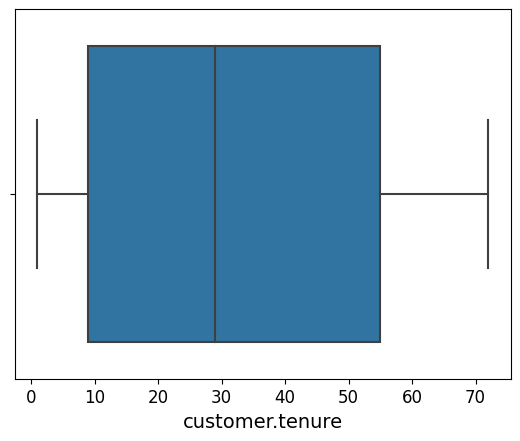

In [30]:
sns.boxplot(x=data_sem_vazio['customer.tenure'])

In [31]:
df_sem_id = data_sem_vazio.drop('customerID', axis=1).copy()

In [32]:
df_sem_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

In [33]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print('-'*30)

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Coluna: internet.OnlineBackup
['Ye

# Representação gráfica dos dados

Com o tratamento inicial já é possível buscar uma visualização gráfica das informações fornecidas pelos dados, com o objetivo de visualizar padrões ou comportamentos.

In [34]:
palette = ["#171821", "#F10040", "#ff7131", "#fe3d67"]
palette

['#171821', '#F10040', '#ff7131', '#fe3d67']

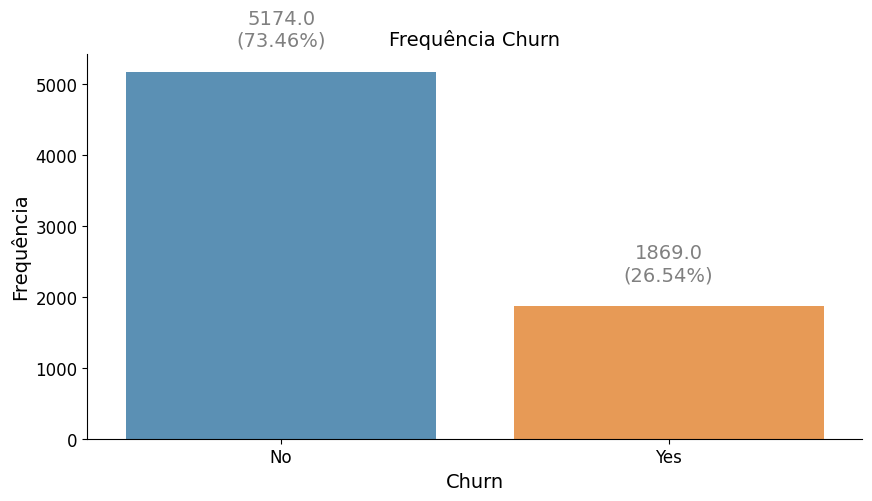

In [35]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df_sem_id, x='Churn', alpha=.8)
#sns.color_palette("Paired", as_cmap=True)
sns.color_palette(palette=palette, as_cmap=True)
sns.despine(right=True, top=True)

plt.ylabel('Frequência')
plt.title('Frequência Churn')
ax.set(xticklabels=["No", "Yes"]);
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{y}\n({y/len(df_sem_id)*100:.2f}%)\n', (x, y),
                ha='center', va='bottom', color='gray')
plt.show()

In [36]:
df_sem_id['Churn'].value_counts(normalize=True).round(3)*100

No     73.5
Yes    26.5
Name: Churn, dtype: float64

A representação da negativa em relação ao Churn é bem superior a positiva no banco de dados analisado, dessa maneira, a amostragem utilizada para o treinamento do algoritmo pode acabar sendo enviesado, e portanto tendencioso para a negativa.

In [37]:
grupo_customer = df_sem_id.filter(like='customer').columns.tolist()[0:-1]
grupo_customer

['customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents']

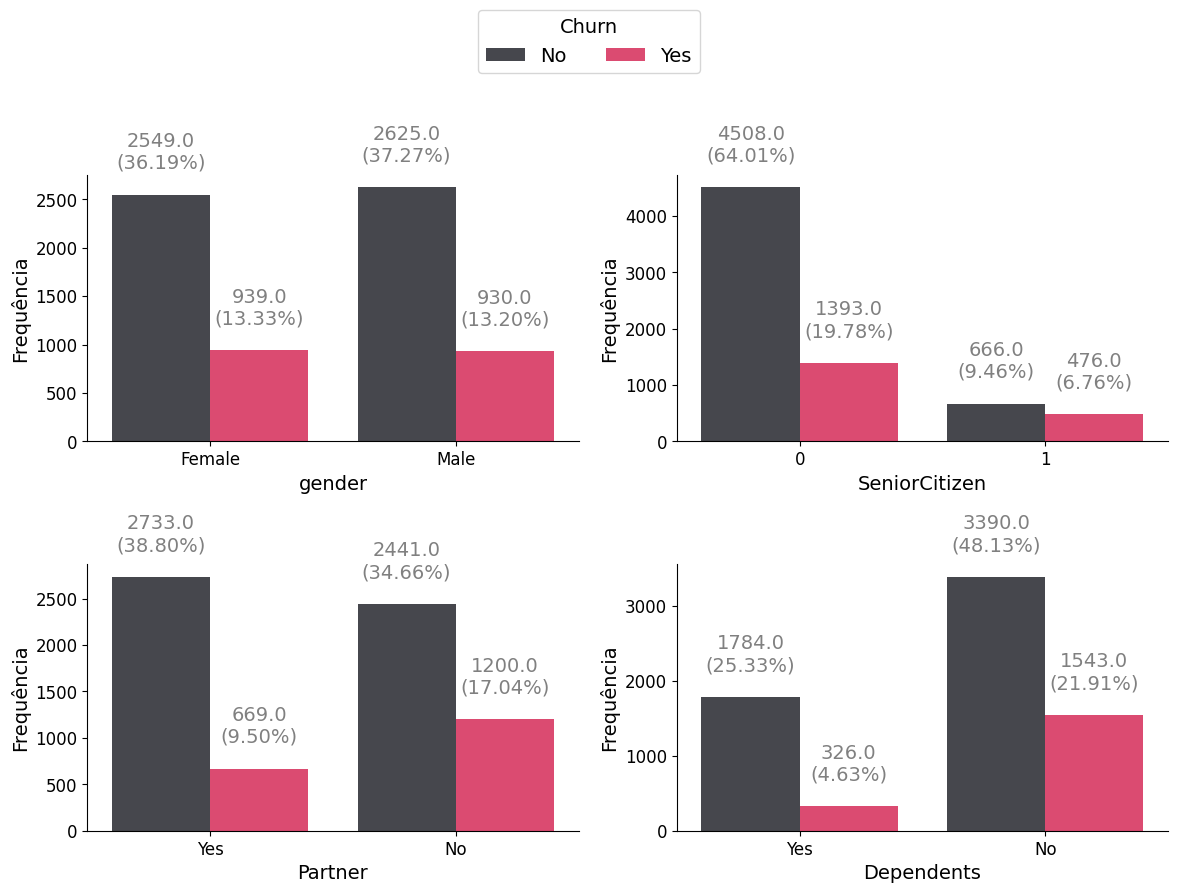

In [38]:
ax = plot_countplots(df_sem_id, 'Churn', grupo_customer)

In [39]:
grupo_phone = df_sem_id.filter(like='phone').columns.tolist()
grupo_phone

['phone.PhoneService', 'phone.MultipleLines']

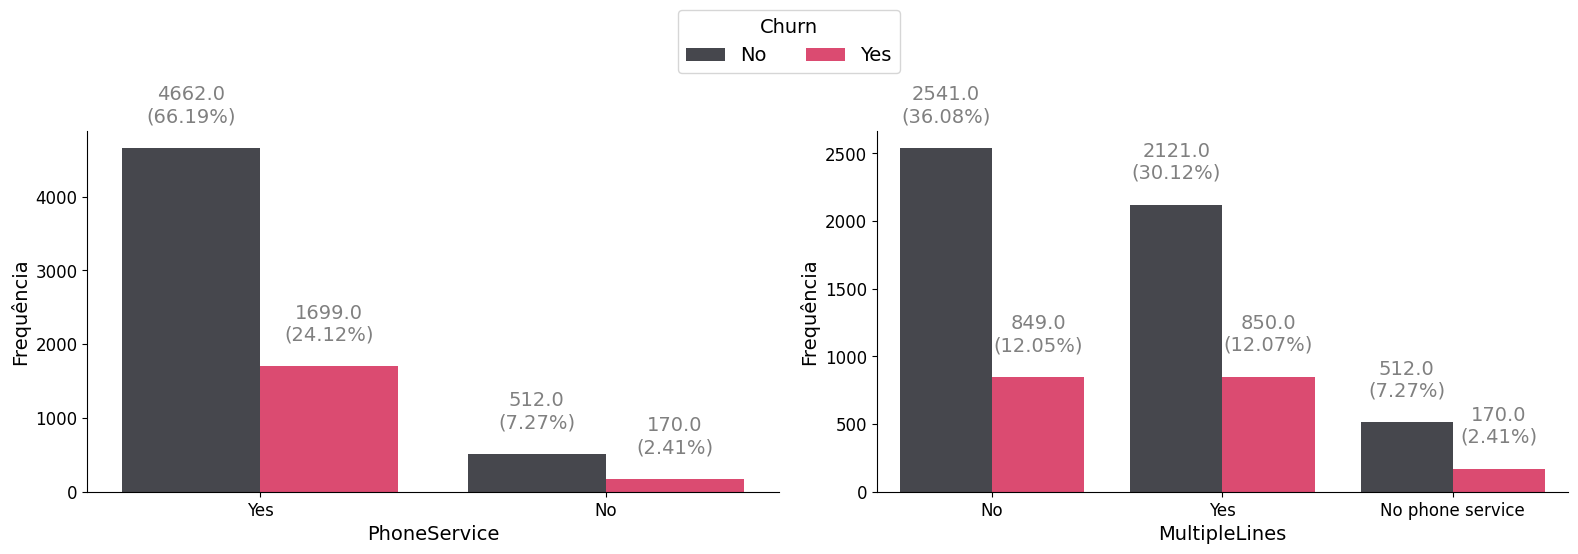

In [40]:
plot_countplots(df_sem_id, 'Churn', grupo_phone, figsize=(16,5))

In [41]:
grupo_internet = df_sem_id.filter(like='internet').columns.tolist()
grupo_internet

['internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies']

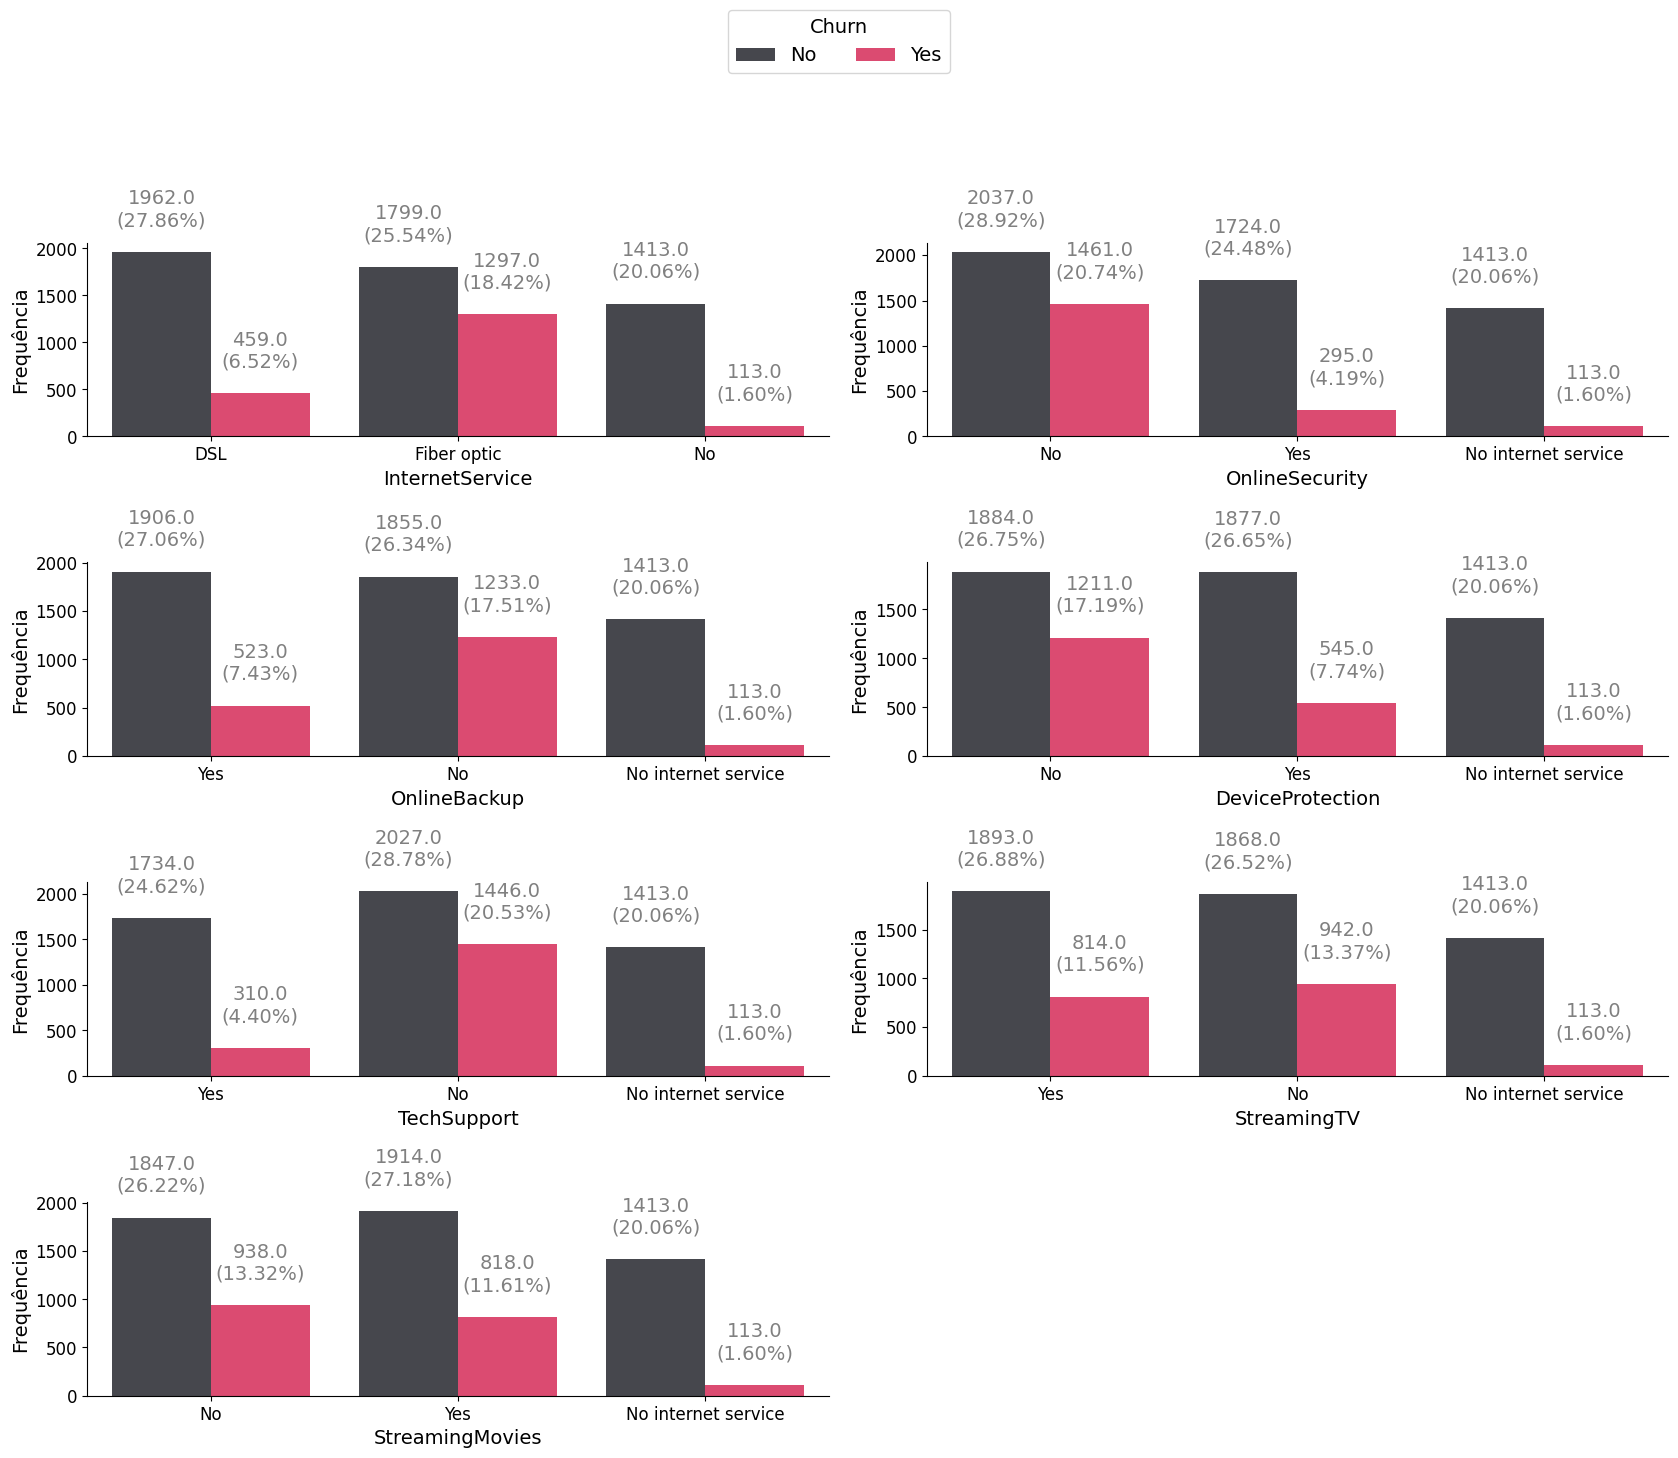

In [42]:
plot_countplots(df_sem_id, 'Churn', grupo_internet, figsize=(17,13))

In [43]:
grupo_account = df_sem_id.filter(like='account').columns.tolist()[:-2]
grupo_account

['account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

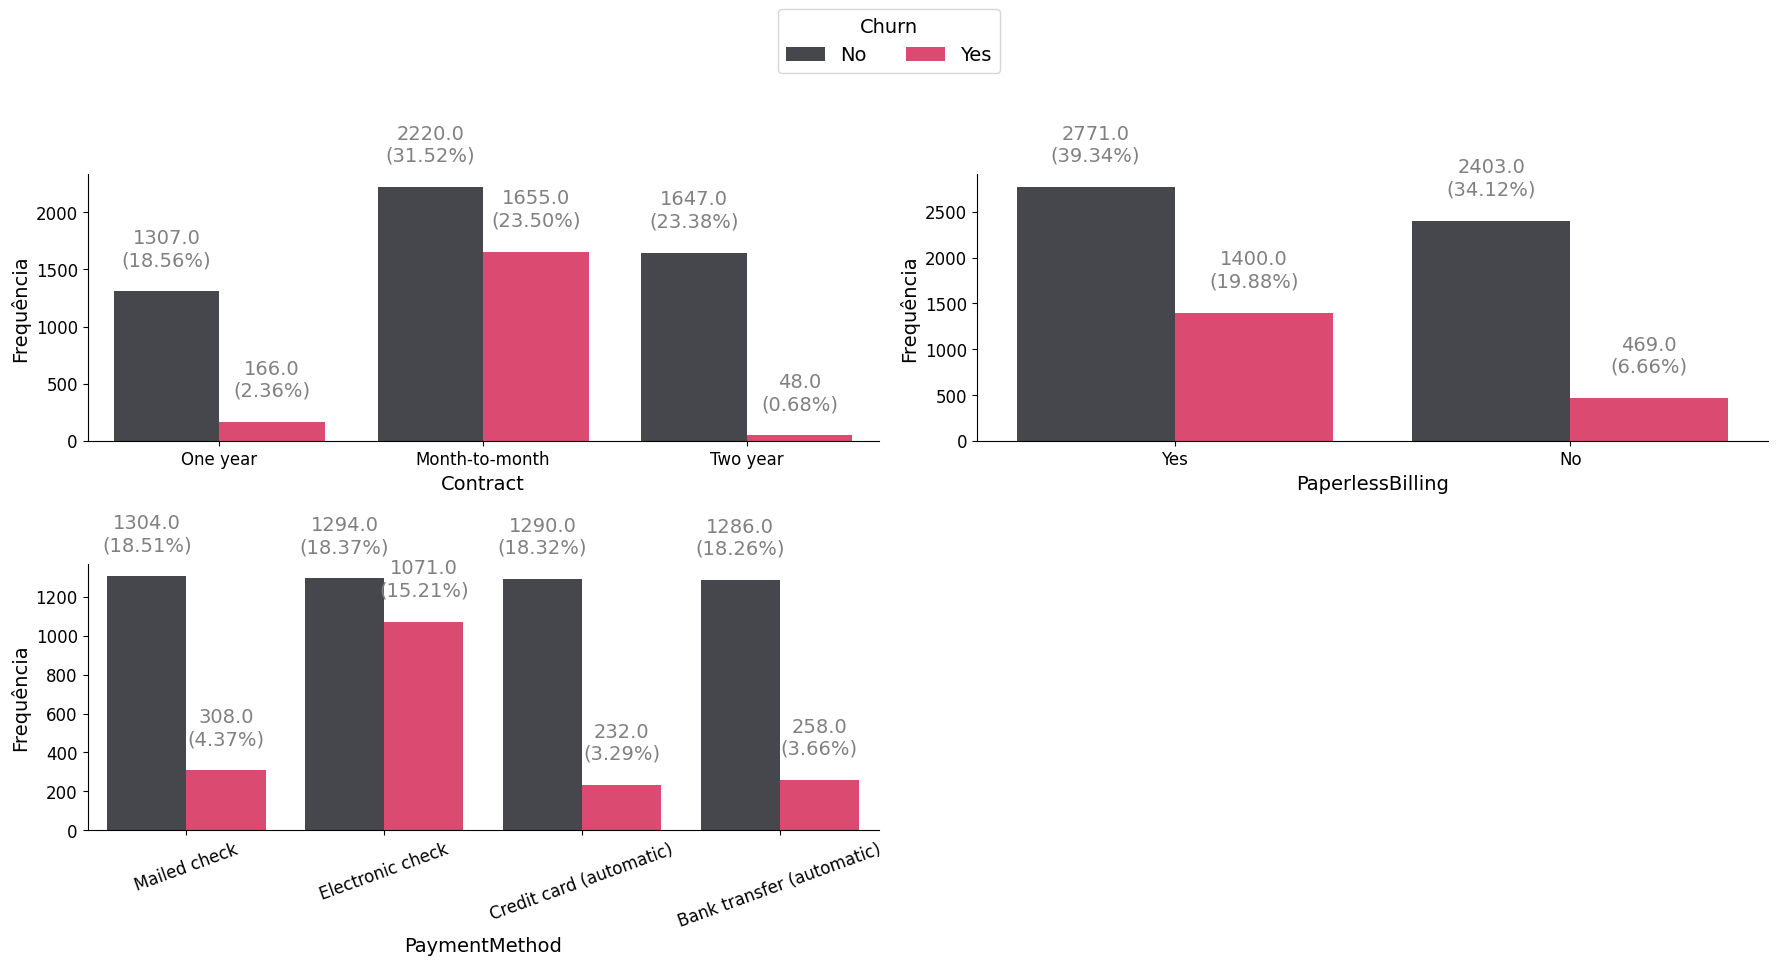

In [44]:
plot_countplots(df_sem_id, 'Churn', grupo_account, figsize=(18, 8))
plt.xticks(rotation=20)
plt.show()

Insights preliminares:

* `SeniorCitizen`: Apesar da presença de poucos dados para pessoas não consideradas seniores, é possível concluir que pessoas com 65 anos ou mais tendem a não cancelar seus planos, de modo bem mais expressivos.
* `PhoneService` e `MultipleLines`: Ambos indicam que dentre os cancelamentos a maior parcela são de pessoas que possuem pelo menos uma linha de telefone
* `Contract`: Apresenta forte correlação do tempo de contrato com a realização do cancelamento, sendo que contratos mais curtos o maior responsável pelos cancelamentos.

A grande maioria das colunas não apresentam correlações representativas com a realização do Churn e algumas algumas demonstram comportamentos bem semelhantes, sendo um indicativo de que talvez seja possível desconsiderá-la durante o processo de aprendizado.

In [45]:
#col_num = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
#df_sem_id[col_num].head()
col_num = df_sem_id.select_dtypes(exclude=['object']).iloc[:,1:]
col_num.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,9,65.6,593.30
1,9,59.9,542.40
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.40


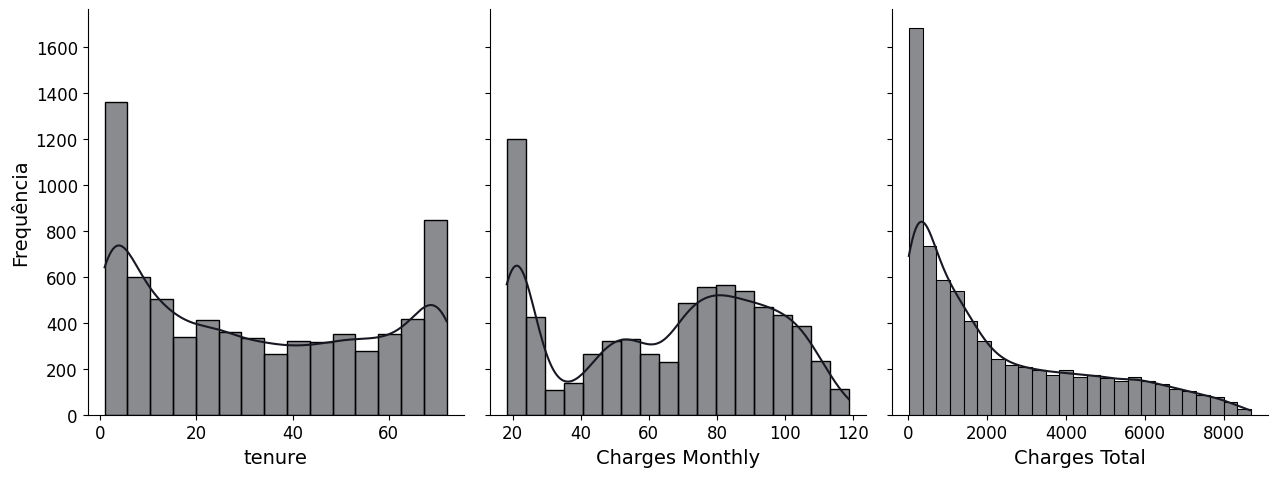

In [46]:
fig, axes = plt.subplots(1, len(col_num.columns), figsize=(13, 5), sharey = True)

for i, col in enumerate(col_num.columns):
    sns.histplot(df_sem_id[col], ax=axes[i], color=palette[0], kde=True)
    sns.despine(right=True, top=True)
    col_name = ' '.join(col.split('.')[1:])
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

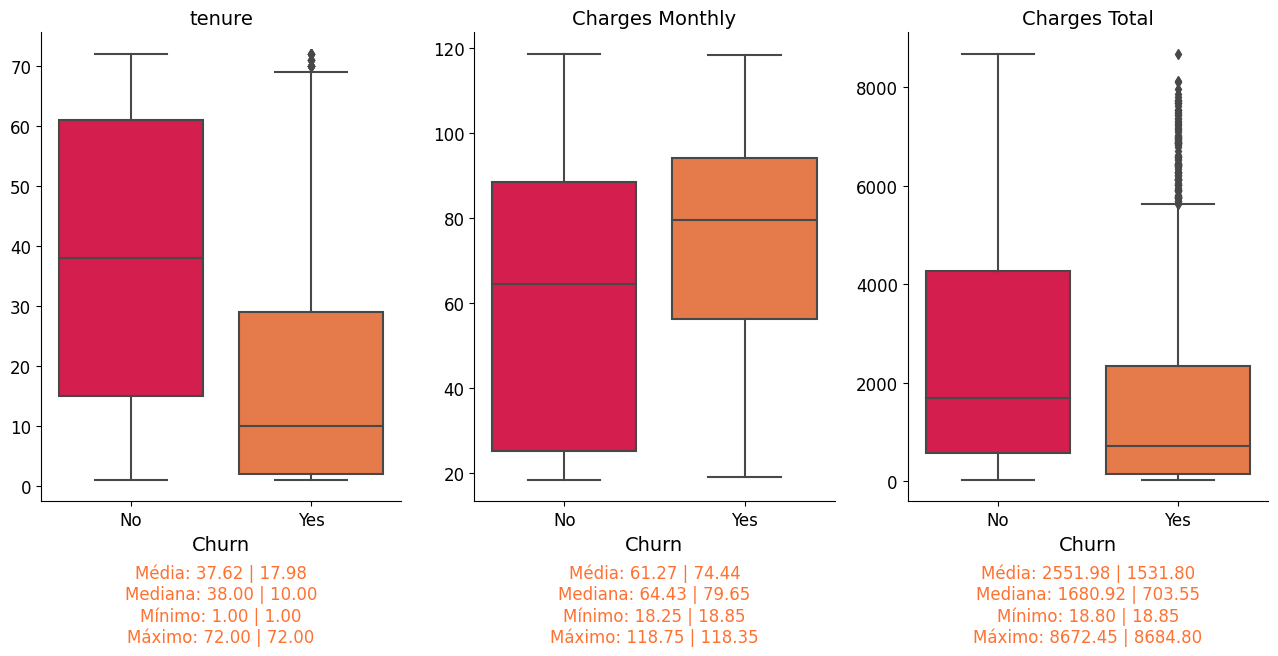

In [47]:
fig, axes = plt.subplots(1, len(col_num.columns), figsize=(13, 7))

for i, col in enumerate(col_num.columns):
    boxplot = sns.boxplot(x='Churn', y=col, data=df_sem_id, ax=axes[i], palette=palette[1:])
    for patch in boxplot.artists:
        patch.set_alpha(0.5)
    sns.despine(right=True, top=True)
    col_name = ' '.join(col.split('.')[1:])
    adicionar_estatisticas(axes[i], df_sem_id, col, -0.3, palette[2])
    axes[i].set_title(col_name)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Conferindo as colunas númericas, é possível afirmar que:

* `Tenure`: Possui distribuição bicaudal
* `Monthly`: Tendência para a distribuição bicaudal
* `Total`: Distribuição assimétrica a esquerda, sinalizando uma alta concentração de contratos anuais baixos em relação a grandes contratos no mesmo período

Em relação aos boxplots a relação entre o Churn e o Charges total confirma o que foi apresentado pelo histograma, no qual a grande quantidade de churn se encontra em contratos com valores inferiores a 2000, com valores superiores a 6000 considerados acima do limite superior e em alguns casos podem ser tratados como outliers, portanto gera o comportamento de distribuição assimétrica para a direita.

Após a verificação da distribuição nas colunas categóricas e dos insights nas colunas numéricas, será necessário a preparação do dataset para a aplicação do algoritmo de aprendizado, portanto iremos remover todas as colunas categóricas e transformá-las em numéricas.

Para isso, inicialmente será realizado uma substituição simples de acordo com um mapeamento e posteriormente o algoritmo de get_dummies oferecido pelo pandas, de modo a simplificar essa transformação. Porém seria possível realizar o mapeamento de todas as colunas, conforme a primeira técnica citada.

In [48]:
mapeamento = {
    'No':0,
    'Yes':1,
    'Male':0,
    'Female':1
}

In [49]:
colunas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

In [50]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,1,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0,0,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,1,0,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,1,0,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,1,1,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7039,1,0,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,0,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7041,0,0,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [51]:
df_dummies = pd.get_dummies(df_sem_id).copy()
df_dummies.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,1,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [52]:
df_dummies.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total',
       'phone.MultipleLines_No', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_DSL',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_No',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No', 'internet.StreamingTV_No

In [53]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer.gender                                  7043 non-null   int64  
 2   customer.SeniorCitizen                           7043 non-null   int64  
 3   customer.Partner                                 7043 non-null   int64  
 4   customer.Dependents                              7043 non-null   int64  
 5   customer.tenure                                  7043 non-null   int64  
 6   phone.PhoneService                               7043 non-null   int64  
 7   account.PaperlessBilling                         7043 non-null   int64  
 8   account.Charges.Monthly                          7043 non-null   float64
 9   account.Charges.Total         

In [54]:
col_num = ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'account.PaperlessBilling', 'account.Charges.Monthly', 'account.Charges.Total']



In [55]:
df_sem_id[col_num].corr().round(3)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total
Churn,1.000,0.009,0.151,-0.150,-0.164,-0.354,0.012,0.192,0.193,-0.199
customer.gender,0.009,1.000,0.002,0.002,-0.011,-0.005,0.006,0.012,0.015,0.000
customer.SeniorCitizen,0.151,0.002,1.000,0.016,-0.211,0.016,0.009,0.157,0.220,0.103
customer.Partner,-0.150,0.002,0.016,1.000,0.453,0.381,0.018,-0.015,0.097,0.318
customer.Dependents,-0.164,-0.011,-0.211,0.453,1.000,0.162,-0.002,-0.111,-0.114,0.063
customer.tenure,-0.354,-0.005,0.016,0.381,0.162,1.000,0.008,0.005,0.247,0.826
phone.PhoneService,0.012,0.006,0.009,0.018,-0.002,0.008,1.000,0.017,0.247,0.113
account.PaperlessBilling,0.192,0.012,0.157,-0.015,-0.111,0.005,0.017,1.000,0.352,0.158
account.Charges.Monthly,0.193,0.015,0.220,0.097,-0.114,0.247,0.247,0.352,1.000,0.651
account.Charges.Total,-0.199,0.000,0.103,0.318,0.063,0.826,0.113,0.158,0.651,1.000


Text(0.5, 1.0, 'Correlation between numerical columns')

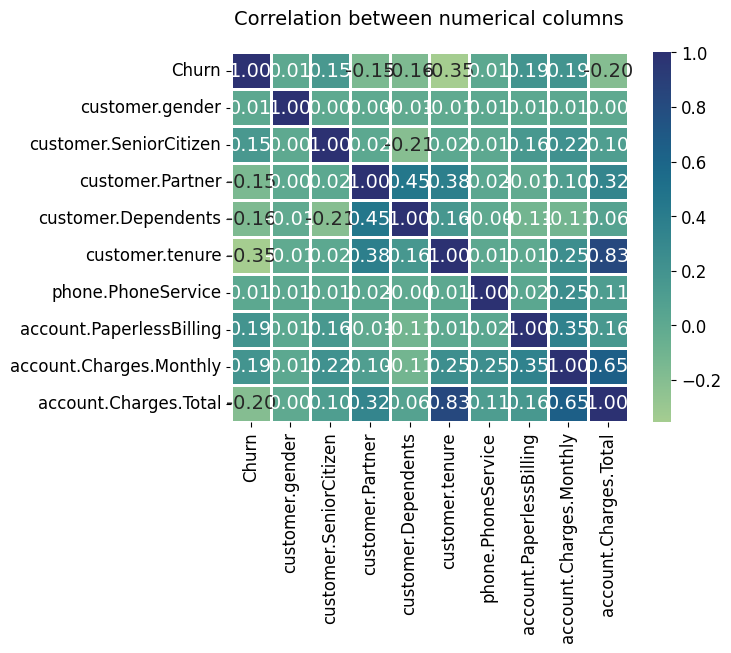

In [56]:
ax = sns.heatmap(data = df_sem_id[col_num].corr().round(3), annot=True, fmt=".2f", linewidth=1, cmap='crest')
ax.set_title('Correlation between numerical columns', pad=20)

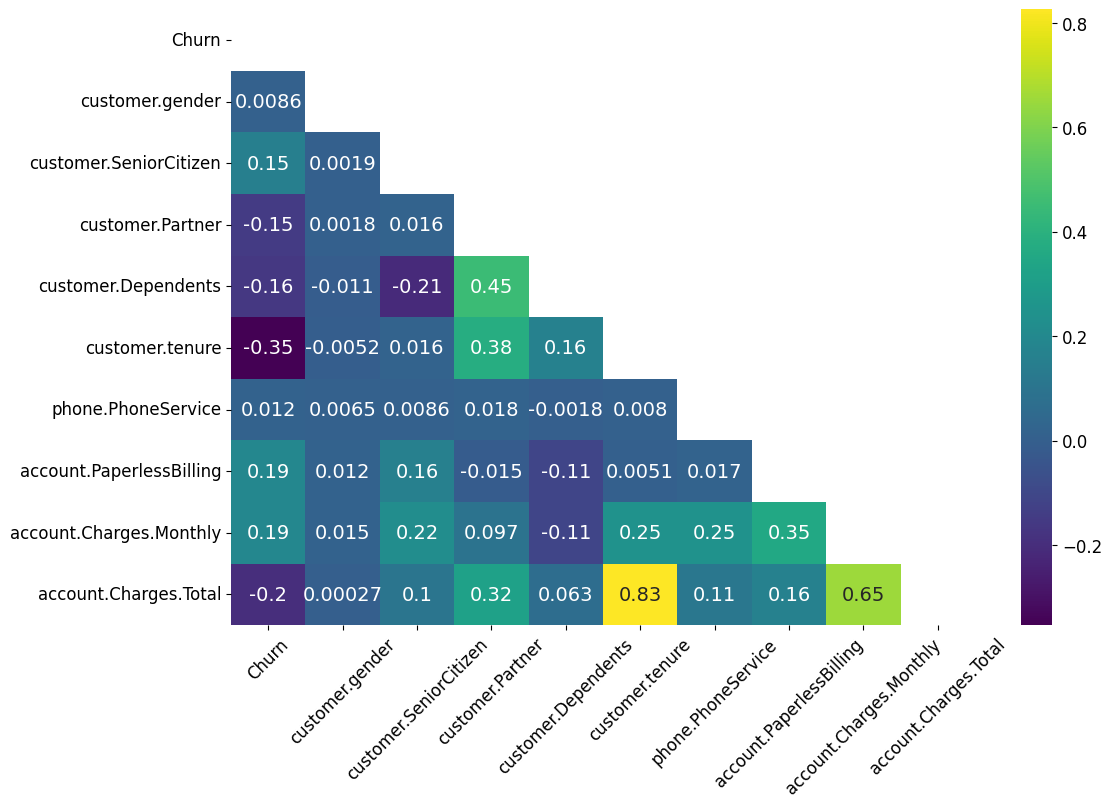

In [57]:
df = df_sem_id[col_num].corr()    

mask = np.triu(np.ones_like(df, dtype=bool))
plt.figure(figsize=(12,8))

ax = sns.heatmap(df,
                 xticklabels=df.columns.values,
                 yticklabels=df.columns.values,
                 annot=True,
                 cmap='viridis',
                 mask=mask)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [58]:
df_sem_id.loc[df_sem_id['Churn']==1]['customer.gender'].count()/df_sem_id.loc[df_sem_id['Churn']]['customer.gender'].count()

0.2653698707936959

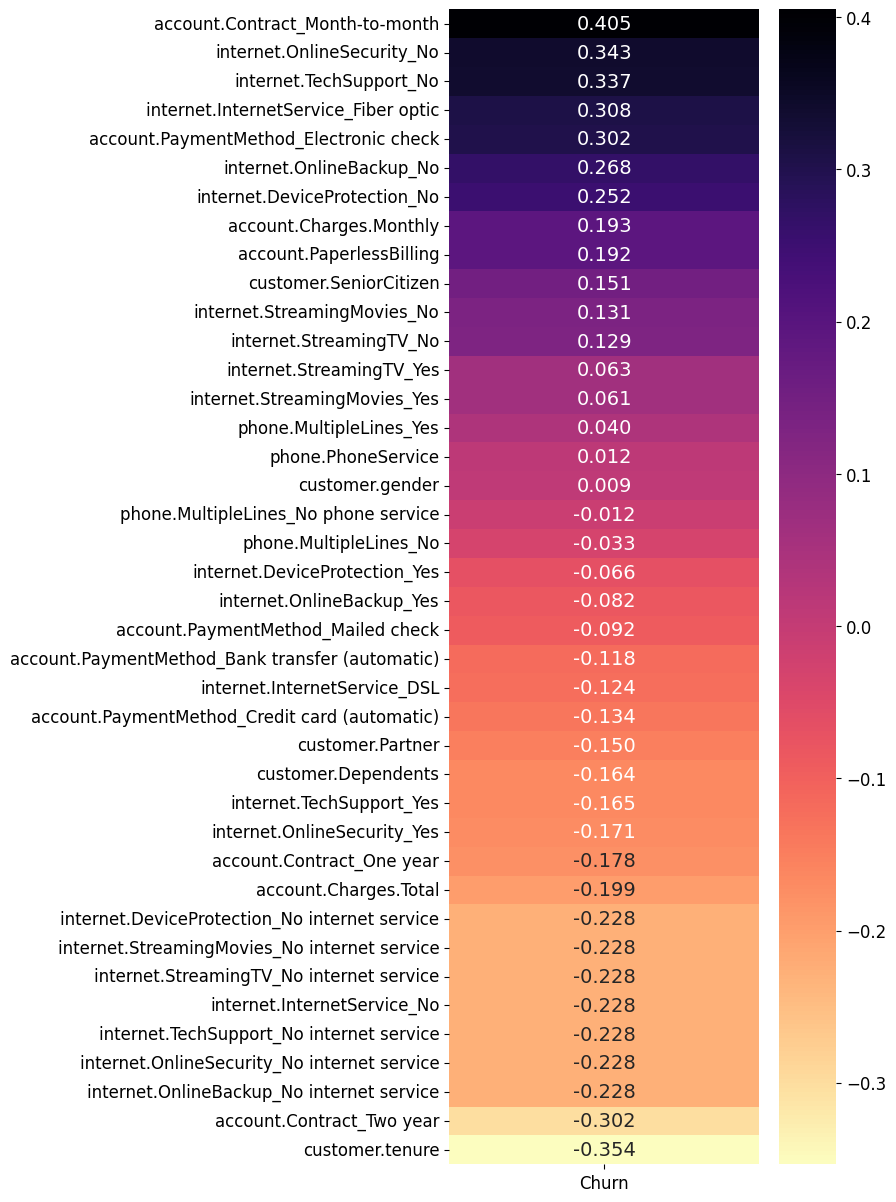

In [59]:
corr = df_dummies.corrwith(df_dummies['Churn']).sort_values(ascending=False).to_frame().iloc[1:,:]
corr.columns = ['Churn']

plt.figure(figsize=(5, 15))
sns.heatmap(corr, annot=True, cmap='magma_r', fmt= '.3f')
plt.show()


# Semana 2

In [64]:
df_dummies.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.495244,0.162147,0.483033,0.299588,32.406929,0.903166,0.592219,64.761692,2281.253259,...,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.529338,0.295752,0.491457,30.090047,2265.703526,...,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1396.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
x = df_dummies[['customer.SeniorCitizen', 'account.Contract_Month-to-month', 'internet.OnlineSecurity_No', 'internet.TechSupport_No']]
y = df_dummies['Churn']

In [77]:
seed = 42
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify=y)

print(f'Treinamos usando:\nx: {len(x_train)}\ny: {len(y_train)}\nTestaremos com:\nx: {len(x_test)}\ny: {len(y_test)}')

model = LinearSVC()
model.fit(x_train, y_train)
previsoes = model.predict(x_test)

taxa_acerto = accuracy_score(y_test, previsoes)

print(f'Taxa de acerto: {round(taxa_acerto*100, 3)}%')

Treinamos usando:
x: 5282
y: 5282
Testaremos com:
x: 1761
y: 1761
Taxa de acerto: 75.412%


In [78]:
previsoes_base = np.zeros(1761)
taxa_acerto_base = accuracy_score(y_test, previsoes_base)
print(f'Taxa de acerto base: {round(taxa_acerto_base*100, 3)}%')

Taxa de acerto base: 73.481%


<AxesSubplot: xlabel='customer.SeniorCitizen', ylabel='account.Contract_Month-to-month'>

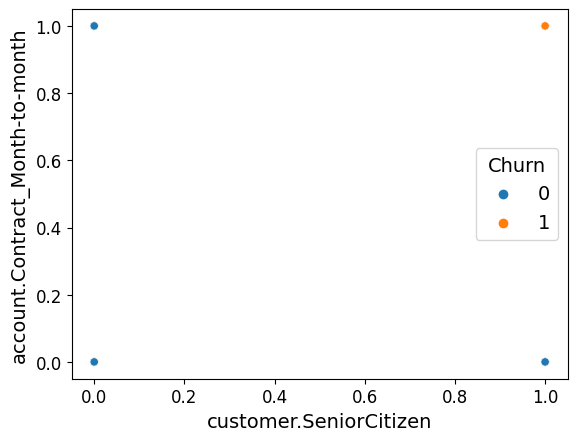

In [79]:
sns.scatterplot(x='customer.SeniorCitizen', y='account.Contract_Month-to-month', hue=y_test, data=x_test)

In [80]:
seed = 42
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify=y)

print(f'Treinamos usando:\nx: {len(x_train)}\ny: {len(y_train)}\nTestaremos com:\nx: {len(x_test)}\ny: {len(y_test)}')

model = SVC(gamma='auto')
model.fit(x_train, y_train)
previsoes = model.predict(x_test)

taxa_acerto = accuracy_score(y_test, previsoes)

print(f'Taxa de acerto: {round(taxa_acerto*100, 3)}%')

Treinamos usando:
x: 5282
y: 5282
Testaremos com:
x: 1761
y: 1761
Taxa de acerto: 76.093%


In [81]:
seed = 42
np.random.seed(seed)
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify=y)

print(f'Treinamos usando:\nx: {len(x_train)}\ny: {len(y_train)}\nTestaremos com:\nx: {len(x_test)}\ny: {len(y_test)}')

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_x_train, y_train)
previsoes = model.predict(raw_x_test)

taxa_acerto = accuracy_score(y_test, previsoes)

print(f'Taxa de acerto: {round(taxa_acerto*100, 3)}%')

Treinamos usando:
x: 5282
y: 5282
Testaremos com:
x: 1761
y: 1761
Taxa de acerto: 76.093%


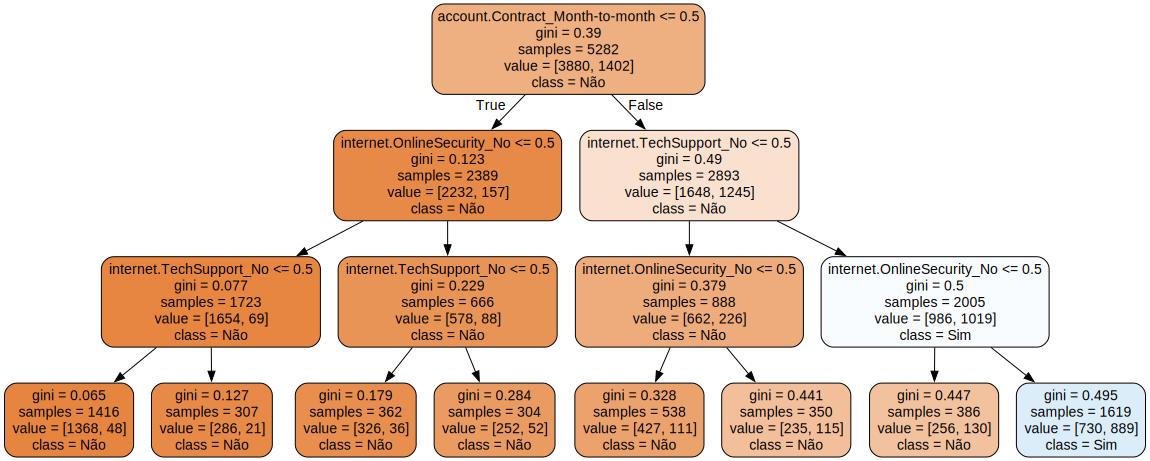

In [82]:
from sklearn.tree import export_graphviz
import graphviz

feature = x.columns

dot_data = export_graphviz(model, out_file=None, feature_names=feature, filled=True, rounded=True,
                          class_names = ['Não', 'Sim'])

grafico = graphviz.Source(dot_data)

grafico